https://github.com/DarkKnight1991/Stock-Price-Prediction

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import os
import sys
import time
import pandas as pd 
from tqdm._tqdm_notebook import tqdm_notebook
import pickle
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import logging

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  
Using TensorFlow backend.


In [0]:
INPUT_PATH = '/content/drive/My Drive/stock'
OUTPUT_PATH = '/content/drive/My Drive/stock/model/lstm_0'
LSTM_model = '/content/drive/My Drive/stock/model/lstm_0/none'
TIME_STEPS = 60
BATCH_SIZE = 20

In [0]:
df_train = pd.read_csv(os.path.join(INPUT_PATH, "Google_Stock_Price_Train.csv"))

In [0]:
df_test = pd.read_csv(os.path.join(INPUT_PATH, "Google_Stock_Price_Test.csv"))

In [0]:
print (df_train.dtypes)

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


In [0]:
print (df_test.dtypes)

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


In [0]:
df_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/16,790.90,792.74,787.28,789.91,623400.0
1254,12/27/16,790.68,797.86,787.66,791.55,789100.0
1255,12/28/16,793.70,794.23,783.20,785.05,1153800.0
1256,12/29/16,783.33,785.93,778.92,782.79,744300.0
1257,12/30/16,782.75,782.78,770.41,771.82,1770000.0


In [0]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/17,778.81,789.63,775.80,786.14,1657300.0
1,1/4/17,788.36,791.34,783.16,786.90,1073000.0
2,1/5/17,786.08,794.48,785.02,794.02,1335200.0
3,1/6/17,795.26,807.90,792.20,806.15,1640200.0
4,1/9/17,806.40,809.97,802.83,806.65,1272400.0


In [0]:
df_train.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


In [0]:
df_test.describe()

,Open,High,Low,Close,Volume
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,807.526000,811.926500,801.949500,807.904500,1.659895e+06
std,15.125428,14.381198,13.278607,13.210088,6.774747e+05
min,778.810000,789.630000,775.800000,786.140000,9.193000e+05
25%,802.965000,806.735000,797.427500,802.282500,1.248500e+06
50%,806.995000,808.640000,801.530000,806.110000,1.418050e+06
75%,809.560000,817.097500,804.477500,810.760000,1.743400e+06
max,837.810000,841.950000,827.010000,835.670000,3.246600e+06


In [0]:
frames = [df_train,df_test]
df = pd.concat(frames,ignore_index=True)

In [0]:
df.describe()

,Open,High,Low,Close,Volume
count,1278.000000,1278.000000,1278.000000,1278.000000,1.278000e+03
mean,537.994906,542.168897,533.278803,714.160039,3.134661e+06
std,154.508365,155.582501,153.174011,163.892416,2.265015e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,406.037500,408.230000,403.335000,578.412500,1.608700e+06
50%,538.395000,542.330000,534.355000,698.150000,2.528700e+06
75%,668.862500,677.705000,662.190000,785.572500,4.106200e+06
max,837.810000,841.950000,827.010000,1216.830000,2.497790e+07


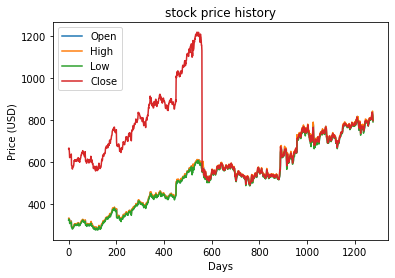

In [0]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(df["Open"])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

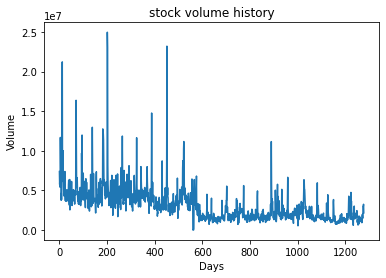

In [0]:
plt.figure()
plt.plot(df["Volume"])

plt.title('stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [0]:
print("checking if any null values are present\n", df.isna().sum())

checking if any null values are present
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df_train = df.loc[0:1257]

train_cols = ["Open","High","Low","Close","Volume"]
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)


# scale the feature MinMax, build array
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_val = min_max_scaler.transform(df_test.loc[:,train_cols])
x_test = min_max_scaler.transform(df.loc[18:,train_cols])

print("Train Val, and  Test size", len(x_train), len(x_val),len(x_test))

Train Val, and  Test size 1022 256 1260


In [0]:
def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [0]:
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [0]:
x_t, y_t = build_timeseries(x_train, 3)
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(x_val, 3)
x_val = trim_dataset(x_temp, BATCH_SIZE)
y_val = trim_dataset(y_temp, BATCH_SIZE)
x_test, y_test = build_timeseries(x_test, 3)
x_test = trim_dataset(x_test, BATCH_SIZE)
y_test = trim_dataset(y_test, BATCH_SIZE)


length of time-series i/o (962, 60, 5) (962,)



length of time-series i/o (196, 60, 5) (196,)



length of time-series i/o (1200, 60, 5) (1200,)


In [0]:
def create_model(l1,l2,l3,l4):
    lstm_model = Sequential()
    
    lstm_model.add(LSTM(l1, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]),
                        dropout=0.0, recurrent_dropout=0.0, stateful=True, return_sequences=True,
                        kernel_initializer='random_uniform'))
    lstm_model.add(Dropout(0.4))
    lstm_model.add(LSTM(l2, dropout=0.0,stateful=True, return_sequences=True))
    lstm_model.add(Dropout(0.4))
    lstm_model.add(LSTM(l3, dropout=0.0,stateful=True, return_sequences=True))
    lstm_model.add(Dropout(0.4))
    lstm_model.add(LSTM(l4, dropout=0.0))
    lstm_model.add(Dense(1,activation='sigmoid'))
    optimizer = optimizers.RMSprop(lr=LR)
    lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)
    return lstm_model

In [0]:
model = None
try:
    model = pickle.load(open(LSTM_model, 'rb'))
    print("Loaded saved model...")
except FileNotFoundError:
    print("Model not found")

Model not found


In [0]:
EPOCHS = 300
LR = 0.002

In [0]:
is_update_model = True
if model is None or is_update_model:
    from keras import backend as K
    print("Building model...")
 
    model = create_model()
    model.summary()
    
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                       patience=40, min_delta=0.0001)
    
    mcp = ModelCheckpoint(os.path.join(OUTPUT_PATH,
                          "best_model.h5"), monitor='val_loss', verbose=1,
                          save_best_only=True, save_weights_only=False, mode='min', period=1)

    # Not used here. But leaving it here as a reminder for future
    r_lr_plat = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=30, 
                                  verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
    
    csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'training_log_' + time.ctime().replace(" ","_") + '.log'), append=True)
    
    history = model.fit(x_t, y_t, epochs=EPOCHS, verbose=2, batch_size=BATCH_SIZE,
                        shuffle=False, validation_data=(x_val,y_val), callbacks=[es, mcp, csv_logger])
    
    print("saving model...")
    pickle.dump(model, open(os.path.join(OUTPUT_PATH, 'lstm_model'), "wb"))

Building model...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (20, 60, 100)             42400     
_________________________________________________________________
dropout_10 (Dropout)         (20, 60, 100)             0         
_________________________________________________________________
lstm_14 (LSTM)               (20, 60, 60)              38640     
_________________________________________________________________
dropout_11 (Dropout)         (20, 60, 60)              0         
_________________________________________________________________
lstm_15 (LSTM)               (20, 60, 60)              29040     
_________________________________________________________________
dropout_12 (Dropout)         (20, 60, 60)              0         
_________________________________________________________________
lstm_16 (LSTM)               (20, 20

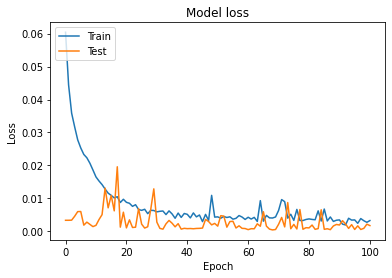

In [0]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.show()
plt.savefig(os.path.join(OUTPUT_PATH, 'train_vis_BS_'+str(BATCH_SIZE)+"_"+time.ctime()+'.png'))

In [0]:
saved_model = load_model(os.path.join(OUTPUT_PATH, 'best_model.h5')) 
print(saved_model)

In [0]:
y_train_pred = saved_model.predict(x_t,batch_size= 20)

In [0]:
y_train_pred = (y_train_pred * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3]
y_t_org =(y_t * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3]

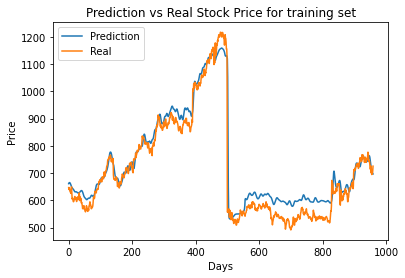

In [0]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(y_train_pred)
plt.plot(y_t_org)
plt.title('Prediction vs Real Stock Price for training set')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
#plt.show()
plt.savefig(os.path.join(OUTPUT_PATH, 'pred_vs_real_BS'+str(BATCH_SIZE)+"_"+time.ctime()+'.png'))

In [0]:
y_val_pred = saved_model.predict(x_val,batch_size= 20)
y_val_pred = (y_val_pred * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3]
y_val_org =(y_val * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3]


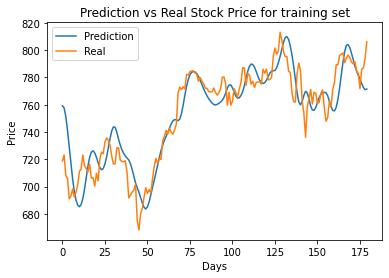

In [0]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(y_val_pred)
plt.plot(y_val_org)
plt.title('Prediction vs Real Stock Price for training set')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')

In [0]:
y_test_pred = saved_model.predict(x_test,batch_size= 20)
y_test_pred = (y_test_pred * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3]
y_test_org =(y_test * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3]

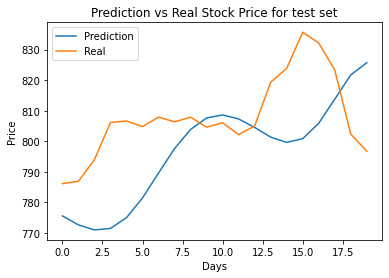

In [0]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(y_test_pred[-20:])
plt.plot(y_test_org[-20:])
plt.title('Prediction vs Real Stock Price for test set')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
#plt.show()
plt.savefig(os.path.join(OUTPUT_PATH, 'pred_vs_real_test'+str(BATCH_SIZE)+"_"+time.ctime()+'.png'))


In [0]:
y=df_test.loc[:,"Close"].values

In [0]:
y

array([786.14, 786.9 , 794.02, 806.15, 806.65, 804.79, 807.91, 806.36,
       807.88, 804.61, 806.07, 802.17, 805.02, 819.31, 823.87, 835.67,
       832.15, 823.31, 802.32, 796.79])

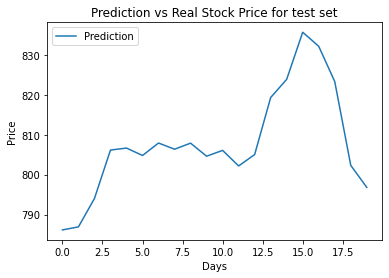

In [0]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(y)
plt.title('Prediction vs Real Stock Price for test set')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
#plt.show()
plt.savefig(os.path.join(OUTPUT_PATH, 'pred_vs_real_test'+str(BATCH_SIZE)+"_"+time.ctime()+'.png'))
